## Project description

The company Megaline (telecom operator) offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
It is necessary to carry out a preliminary analysis of the plans based on a relatively small client selection. There is data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Main research objective is to study clients' behavior and determine which prepaid plan brings in more revenue.


### Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

#### Surf
Monthly charge: $20

500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:

1 minute: 3 cents

1 text message: 3 cents

1 GB of data: $10

#### Ultimate

Monthly charge: $70

3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7

## Table of contents:
- [**STEP 1. General information about data**](#first-step)
- [**STEP 2. Data preprocessing**](#second-step)
    - [Data type replacement](#data-type-replacement)
    - [Finding and eliminating errors in the data](#finding-errors)
    - [Calculating of parameters](#calculating-parameters)
- [**STEP 3. Data analyzing**](#third-step)
- [**STEP 4. Testing of hypotheses**](#fourth-step)
- [**STEP 5. General conclusion**](#fifth-step)

## Step 1. General information about data <a class="anchor" id="first-step"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
users = pd.read_csv('megaline_users.csv')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [3]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [4]:
pd.isnull(users).sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [5]:
(~pd.isnull(users['churn_date'])).astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: churn_date, Length: 500, dtype: int64

In [6]:
users['has_churned'] = (~pd.isnull(users['churn_date'])).astype(int)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,has_churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
user_id        500 non-null int64
first_name     500 non-null object
last_name      500 non-null object
age            500 non-null int64
city           500 non-null object
reg_date       500 non-null object
plan           500 non-null object
churn_date     34 non-null object
has_churned    500 non-null int64
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [8]:
users['has_churned'].value_counts()

0    466
1     34
Name: has_churned, dtype: int64

### Conclusion

We have data on 500 users between the ages of 18 and 75. The average age of users is 45.5 years. Only in column churn_date there are NaN values, this indicates that today the client uses the services of the company Megaline. 466 users continue use services and 34 users stopped to use. To work with this information we created a new column 'has_churned', which contains two values: 0 - user has not stopped using the service and 1 - user stopped using the service. Besides, values in column 'reg_date' require changing datatype to datetime.

In [4]:
calls = pd.read_csv('megaline_calls.csv')
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


### Conclusion

In 2018 there were 137735 calls registered. On average, the conversation lasted 6.7 minutes. The minimum call lasted 0.0 minutes, which may indicate an erroneous call or a missed call. The maximum call lasted 37.6 minutes. Now column 'call_date' have format object and to continue working is required to change datatype to datetime.

In [5]:
internet = pd.read_csv('megaline_internet.csv')
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [14]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


### Conclusion

In 2018, an average of 367 megabits were used per person. The minimum was zero megabits, it may be because of failed connection. And the maximum was 1693 mb. Column 'session_date' is required to change datatype to datetime.

In [6]:
messages = pd.read_csv('megaline_messages.csv')
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Conclusion

In 2018 there was sent 76051 messages. The data does not contain null values. To continue working is required to change datatype of the column 'message_date' to datetime.

In [7]:
plans = pd.read_csv('megaline_plans.csv')
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [18]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### Conclusion

Data 'plans' contain information about two plans of using service of the company Megaline. There is no null values and no nessecary to conver datatypes.

## Step 2. Data preprocessing <a class="anchor" id="second-step"></a>


### Data type replacement <a class="anchor" id="data-type-replacement"></a>

In [19]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [20]:
#converting format  to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

#creating a new column wich contan only year and month
calls['year_month'] = calls['call_date'].dt.to_period('M')
internet['year_month'] = internet['session_date'].dt.to_period('M')
messages['year_month'] = messages['message_date'].dt.to_period('M')

calls.info()
internet.info()
messages.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id            137735 non-null object
user_id       137735 non-null int64
call_date     137735 non-null datetime64[ns]
duration      137735 non-null float64
year_month    137735 non-null period[M]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
year_month      104825 non-null period[M]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id              76051 non-null object
user_id         76051 non-null int64
messa

### Finding and eliminating errors in the data <a class="anchor" id="finding-errors"></a> 


Explain

(Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.)

1. The column mb_used (data 'internet') contains 0.0 values. The cause may be that it was a request from user to connect, but connection was failed or the user did not wait for an answer and ended the work with the Internet. It seems that to continue working with data 'internet' can delete rows with 0.0 values because that don't influence on our general goal to determine revenue. Users don't pay for 0 mb. We can use slicing to eliminate 0 values.

In [21]:
internet = internet.query('mb_used > 0')

In [22]:
internet.describe()


,user_id,mb_used
count,91078.000000,91078.000000
mean,1242.576923,422.064206
std,141.992374,255.063501
min,1000.000000,0.010000
25%,1122.000000,223.380000
50%,1236.000000,395.905000
75%,1367.000000,588.367500
max,1499.000000,1693.470000


Now we haven't rows with 0 mb used.

2. The column duration (data 'calls') contains 0.0 values. It can be missed calls or rejected or mistakenly dialed and dropped. On our opinion it isn't so important because it is no effect on the users' costs (company revenue). And we can delete rows with 0.0 values. For this matter we will use slicing.

In [23]:
#rounding to whole minutes
calls['duration_call'] = np.ceil(calls['duration']).astype(int)

In [24]:
calls = calls.query('duration_call > 0')

In [25]:
calls.describe()

,user_id,duration,duration_call
count,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.378196,8.875907
std,139.475249,5.354567,5.355181
min,1000.000000,0.010000,1.000000
25%,1127.000000,4.150000,5.000000
50%,1247.000000,7.710000,8.000000
75%,1365.000000,11.820000,12.000000
max,1499.000000,37.600000,38.000000


Now we haven't rows with 0 minutes

3. It would be more convenient if the values in the column churn_date from data 'users' was stored in datetime format. But in this case, we would not be able to add NaN values to this column, which indicate that this user has not stopped using the service. For convenience, above we have added a column 'has_churned', taking values 0 - when user don't stop using the service and 1 - when user stopped using service.

4. To check outliers and possible errors we will plot histograms.

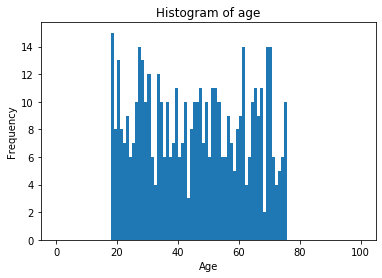

In [26]:
 #plotting histogram
users['age'].plot(kind='hist', bins=100, range=[0,100], title='Histogram of age')
plt.xlabel('Age')
plt.show( )

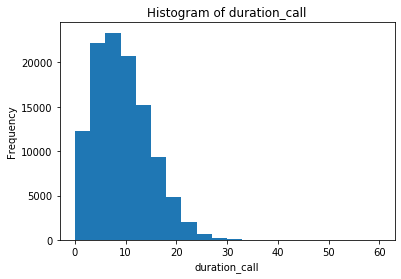

In [27]:
 #plotting histogram
calls['duration_call'].plot(kind='hist', bins=20, range=[0,60], title='Histogram of duration_call')
plt.xlabel('duration_call')
plt.show( )

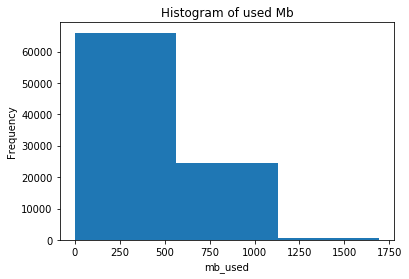

In [28]:
#plotting histogram
internet['mb_used'].plot(kind='hist', bins=3, title='Histogram of used Mb')
plt.xlabel('mb_used')
plt.show( )

We can conclude that datas do not contain significant outliers and errors that require deletion or correction.

### Calculating of parameters <a class="anchor" id="calculating-parameters"></a> 

#### 1. The number of calls made per month for each user

In [29]:
calls_per_month = calls.groupby(['user_id', 'year_month'])['id'].count()
calls_per_month

user_id  year_month
1000     2018-12       16
1001     2018-08       22
         2018-09       38
         2018-10       47
         2018-11       49
                       ..
1498     2018-12       32
1499     2018-09       35
         2018-10       41
         2018-11       39
         2018-12       56
Name: id, Length: 2256, dtype: int64

#### 2. The number of minutes used per month for each user

In [30]:
minutes_per_month = calls.groupby(['user_id', 'year_month'])['duration_call'].sum()
minutes_per_month

user_id  year_month
1000     2018-12       124
1001     2018-08       182
         2018-09       315
         2018-10       393
         2018-11       426
                      ... 
1498     2018-12       339
1499     2018-09       346
         2018-10       385
         2018-11       308
         2018-12       496
Name: duration_call, Length: 2256, dtype: int64

#### 3. The number of text messages sent per month for each user

In [31]:
messages_per_month = messages.groupby(['user_id', 'year_month'])['message_date'].count()
messages_per_month

user_id  year_month
1000     2018-12       11
1001     2018-08       30
         2018-09       44
         2018-10       53
         2018-11       36
                       ..
1496     2018-09       21
         2018-10       18
         2018-11       13
         2018-12       11
1497     2018-12       50
Name: message_date, Length: 1806, dtype: int64

#### 4. The volume of data per month for each user

In [32]:
mb_per_month = (internet.groupby(['user_id', 'year_month'])['mb_used'].sum()/1024).apply(np.ceil)*1024
mb_per_month

user_id  year_month
1000     2018-12        2048.0
1001     2018-08        7168.0
         2018-09       14336.0
         2018-10       22528.0
         2018-11       19456.0
                        ...   
1498     2018-12       23552.0
1499     2018-09       13312.0
         2018-10       20480.0
         2018-11       17408.0
         2018-12       22528.0
Name: mb_used, Length: 2277, dtype: float64

In [33]:
pd.concat([calls_per_month, minutes_per_month, messages_per_month, mb_per_month], 1)

id  duration_call  message_date  mb_used
user_id year_month                                            
1000    2018-12     16.0          124.0          11.0   2048.0
1001    2018-08     22.0          182.0          30.0   7168.0
        2018-09     38.0          315.0          44.0  14336.0
        2018-10     47.0          393.0          53.0  22528.0
        2018-11     49.0          426.0          36.0  19456.0
...                  ...            ...           ...      ...
1498    2018-12     32.0          339.0           NaN  23552.0
1499    2018-09     35.0          346.0           NaN  13312.0
        2018-10     41.0          385.0           NaN  20480.0
        2018-11     39.0          308.0           NaN  17408.0
        2018-12     56.0          496.0           NaN  22528.0

[2293 rows x 4 columns]

In [34]:
#reseting indexes and renaming columns
agg_data = pd.concat([calls_per_month, minutes_per_month, messages_per_month, mb_per_month], 1).reset_index().fillna(0)
agg_data_columns = ['user_id', 'year_month', 'calls_count', 'call_duration', 'message_count', 'mb_used']

agg_data.columns = agg_data_columns

#merging information to one table
agg_data = agg_data.merge(users, on='user_id')


In [35]:
agg_data

,user_id,year_month,calls_count,call_duration,message_count,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,has_churned
0,1000,2018-12,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,2018-08,22.0,182.0,30.0,7168.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1001,2018-09,38.0,315.0,44.0,14336.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
3,1001,2018-10,47.0,393.0,53.0,22528.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
4,1001,2018-11,49.0,426.0,36.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,32.0,339.0,0.0,23552.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0
2289,1499,2018-09,35.0,346.0,0.0,13312.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0
2290,1499,2018-10,41.0,385.0,0.0,20480.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0
2291,1499,2018-11,39.0,308.0,0.0,17408.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0


In [36]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
user_id          2293 non-null int64
year_month       2293 non-null period[M]
calls_count      2293 non-null float64
call_duration    2293 non-null float64
message_count    2293 non-null float64
mb_used          2293 non-null float64
first_name       2293 non-null object
last_name        2293 non-null object
age              2293 non-null int64
city             2293 non-null object
reg_date         2293 non-null datetime64[ns]
plan             2293 non-null object
churn_date       158 non-null object
has_churned      2293 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5), period[M](1)
memory usage: 268.7+ KB


#### 4. The monthly revenue from each user 

In [37]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [38]:
#merging data with information about plans
agg_data = agg_data.merge(plans, left_on='plan', right_on='plan_name')
agg_data.head()

,user_id,year_month,calls_count,call_duration,message_count,mb_used,first_name,last_name,age,city,...,churn_date,has_churned,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaN,0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,2018-11,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,2018-12,7.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,2018-10,54.0,476.0,21.0,17408.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaN,0,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,2018-11,50.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaN,0,1000,30720,3000,70,7,0.01,0.01,ultimate


In [39]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
user_id                  2293 non-null int64
year_month               2293 non-null period[M]
calls_count              2293 non-null float64
call_duration            2293 non-null float64
message_count            2293 non-null float64
mb_used                  2293 non-null float64
first_name               2293 non-null object
last_name                2293 non-null object
age                      2293 non-null int64
city                     2293 non-null object
reg_date                 2293 non-null datetime64[ns]
plan                     2293 non-null object
churn_date               158 non-null object
has_churned              2293 non-null int64
messages_included        2293 non-null int64
mb_per_month_included    2293 non-null int64
minutes_included         2293 non-null int64
usd_monthly_pay          2293 non-null int64
usd_per_gb               2293 non-null int64
usd_per_messa

In [40]:
#counting messages costs for each user per month
agg_data['message_cost'] = agg_data.apply(lambda x: max(0, x['message_count'] - x['messages_included'])*x['usd_per_message'],
                                          axis = 1)
#counting calls costs for each user per month
agg_data['call_cost'] = agg_data.apply(lambda x: max(0, x['call_duration'] - x['minutes_included'])*x['usd_per_minute'],
                                          axis = 1)
#counting costs for internet for each user per month
agg_data['gb_cost'] = agg_data.apply(lambda x: max(0, x['mb_used'] - x['mb_per_month_included'])/1024*x['usd_per_gb'],
                                          axis = 1)
#counting total costs for each user per month
agg_data['total_cost'] = agg_data['message_cost'] + agg_data['call_cost'] + agg_data['gb_cost'] + agg_data['usd_monthly_pay']
agg_data['total_cost']

0        70.0
1        70.0
2        84.0
3        70.0
4        70.0
        ...  
2288    100.0
2289     20.0
2290     70.0
2291     40.0
2292     90.0
Name: total_cost, Length: 2293, dtype: float64

In [41]:
agg_data['total_cost'].describe()

count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: total_cost, dtype: float64

### Conclusion

The minimum monthly revenue of the company Megaline from one user is 20 usd, which corresponds to the minimum monthly pay for the plan Surf. Average monthly revenue from one user is 64 usd. The maximum company receives 590 usd per user.

## STEP 3. Data analyzing <a class="anchor" id="third-step"></a>

#### Find the minutes the users of each plan require per month.

In [42]:
agg_data.groupby(['plan'])['call_duration'].agg([np.mean, np.var, np.std, np.median])

,mean,var,std,median
plan,,,,
surf,428.749523,54968.279461,234.453150,425.0
ultimate,430.450000,57844.464812,240.508762,424.0


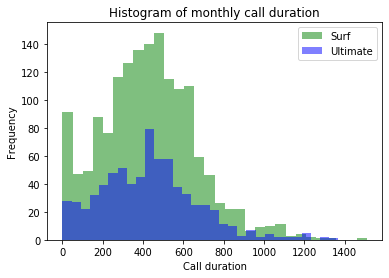

In [43]:
x1 = agg_data.loc[agg_data.plan=='surf', 'call_duration']
x2 = agg_data.loc[agg_data.plan=='ultimate', 'call_duration']


kwargs = dict(alpha=0.5, bins=30)

plt.hist(x1, **kwargs, color='g', label='Surf')
plt.hist(x2, **kwargs, color='b', label='Ultimate')

plt.gca().set(title='Histogram of monthly call duration', ylabel='Frequency', xlabel='Call duration')
#plt.xlim(0,1400)
plt.legend();

In [44]:
agg_data.groupby(['plan'])['user_id'].count()

plan
surf        1573
ultimate     720
Name: user_id, dtype: int64

### Conclusion

Frequency of call duration for the plan Surf is large than for the plan Ultimate.
On the histogram we can see positive skew. For both of plans the mean value of monthly call duration is greater than the median. On average users of plan Surf require 429 minutes per month and users of Ultimate plan require 430 min.

#### Find the texts the users of each plan require per month.

In [45]:
agg_data.groupby(['plan'])['message_count'].agg([np.mean, np.var, np.std, np.median])

,mean,var,std,median
plan,,,,
surf,31.159568,1126.724522,33.566717,24.0
ultimate,37.551389,1208.756744,34.767179,30.0


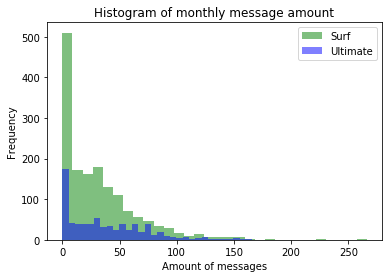

In [46]:
x1 = agg_data.loc[agg_data.plan=='surf', 'message_count']
x2 = agg_data.loc[agg_data.plan=='ultimate', 'message_count']


kwargs = dict(alpha=0.5, bins=30)

plt.hist(x1, **kwargs, color='g', label='Surf')
plt.hist(x2, **kwargs, color='b', label='Ultimate')

plt.gca().set(title='Histogram of monthly message amount', ylabel='Frequency', xlabel='Amount of messages')
#plt.xlim(0,150)
plt.legend();

### Conclusion

Frequency of sent messages for the plan Surf is larger than for plan Ultimate. Most often, for each plan, only a few messages are sent per month. On the histogram we can see positive skew. For both of plans the mean value of monthly sent messages is significantly greater than the median. On average users of plan Surf require 31 messages per month and users of Ultimate plan require 38 mes.

#### Find the volume of data the users of each plan require per month.

In [47]:
agg_data.groupby(['plan'])['mb_used'].agg([np.mean, np.var, np.std, np.median])

,mean,var,std,median
plan,,,,
surf,17070.789574,6.457508e+07,8035.862417,17408.0
ultimate,17722.311111,6.168830e+07,7854.190127,17408.0


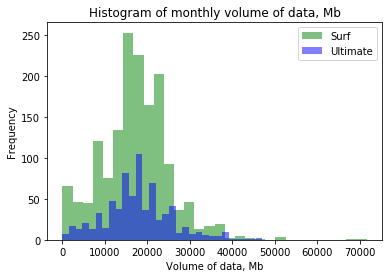

In [48]:
x1 = agg_data.loc[agg_data.plan=='surf', 'mb_used']
x2 = agg_data.loc[agg_data.plan=='ultimate', 'mb_used']


kwargs = dict(alpha=0.5, bins=30)

plt.hist(x1, **kwargs, color='g', label='Surf')
plt.hist(x2, **kwargs, color='b', label='Ultimate')

plt.gca().set(title='Histogram of monthly volume of data, Mb', ylabel='Frequency', xlabel='Volume of data, Mb')
#plt.xlim(0,100)
plt.legend();

### Conclusion

Frequency of mb used for the plan Surf is larger than for plan Ultimate. On this histogram we can see different distribution for the plans Surf and Ultimate. In case of plan Surf there is a negative skew and mean value lower than median. For the plan Ultimate on the contrary there is a positive skew and the mean value is larger than median. On average users of plan Surf require 17071 mb per month and users of Ultimate plan require 17722 mb.

## STEP 4. Testing of hypotheses <a class="anchor" id="fourth-step"></a>

### The average revenue from users of Ultimate and Surf calling plans differs.

#### Formulating hypotheses
Null hypothesis H₀: the average revenue from users of Ultimate equals the average revenue from users of Surf

Alternative hypothesis H₁: the average revenue from users of Ultimate not equals the average revenue from users of Surf

alpha = 0,05

if pvalue is lower than alpha, we can reject null hypothesis.
if pvalue is greater than alpha, we can not reject null hypothesis.


In [49]:
agg_data.groupby(['plan'])['total_cost'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,60.706408,3067.835152,55.388042
ultimate,72.313889,129.848486,11.395108


In [50]:
from scipy import stats as st
alpha = 0.05

results = st.ttest_ind(
        agg_data.loc[agg_data['plan']=='ultimate', 'total_cost'], 
        agg_data.loc[agg_data['plan']=='surf', 'total_cost'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  2.862674510698644e-08
We reject the null hypothesis


### Conclusion

The parameter pvalue is significantly lower than alpha, it means that we can reject our null hypothesis. The average revenue from users of Surf plan differ (lower) from the average revenue from users of Ultimate plan. They are 60,7 usd and 72,3 usd accordingly.

#### The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [51]:
agg_data.head()

,user_id,year_month,calls_count,call_duration,message_count,mb_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,message_cost,call_cost,gb_cost,total_cost
0,1000,2018-12,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
1,1006,2018-11,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
2,1006,2018-12,7.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,14.0,84.0
3,1008,2018-10,54.0,476.0,21.0,17408.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
4,1008,2018-11,50.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0


In [52]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 26 columns):
user_id                  2293 non-null int64
year_month               2293 non-null period[M]
calls_count              2293 non-null float64
call_duration            2293 non-null float64
message_count            2293 non-null float64
mb_used                  2293 non-null float64
first_name               2293 non-null object
last_name                2293 non-null object
age                      2293 non-null int64
city                     2293 non-null object
reg_date                 2293 non-null datetime64[ns]
plan                     2293 non-null object
churn_date               158 non-null object
has_churned              2293 non-null int64
messages_included        2293 non-null int64
mb_per_month_included    2293 non-null int64
minutes_included         2293 non-null int64
usd_monthly_pay          2293 non-null int64
usd_per_gb               2293 non-null int64
usd_per_messa

In [53]:
#function to create a column with highlighted state names
def set_state(city):
    state = city.split(' ')[-2]
    return state

agg_data['state'] = agg_data['city'].apply(set_state)

In [54]:
agg_data['state'].unique()

array(['GA', 'CA', 'FL', 'OH', 'TN', 'TX', 'PA-NJ-DE-MD', 'IL-IN-WI',
       'NY-NJ-PA', 'AL', 'OK', 'CO', 'WA', 'NV', 'IN', 'SC', 'NC-SC',
       'AZ', 'UT', 'MI', 'CT', 'OH-KY-IN', 'VA-NC', 'KY-IN', 'VA',
       'MO-IL', 'MN-WI', 'LA', 'TN-MS-AR', 'PA', 'DC-VA-MD-WV', 'OR-WA',
       'MA-NH', 'NE-IA', 'NM', 'NY', 'RI-MA', 'HI', 'MD', 'WI', 'MO-KS',
       'NC'], dtype=object)

In [55]:
#creating a working column, where True means states including NY-NJ, False - other states
def set_is_target_state(state):
    target_states = ['PA-NJ-DE-MD', 'NY-NJ-PA', 'NY']
    if state in target_states:
        return True
    else:
        return False

agg_data['is_target_state'] = agg_data['state'].apply(set_is_target_state)

In [56]:
agg_data.head()

,user_id,year_month,calls_count,call_duration,message_count,mb_used,first_name,last_name,age,city,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,message_cost,call_cost,gb_cost,total_cost,state,is_target_state
0,1000,2018-12,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0,GA,False
1,1006,2018-11,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0,CA,False
2,1006,2018-12,7.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,7,0.01,0.01,ultimate,0.0,0.0,14.0,84.0,CA,False
3,1008,2018-10,54.0,476.0,21.0,17408.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0,FL,False
4,1008,2018-11,50.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0,FL,False


In [57]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 28 columns):
user_id                  2293 non-null int64
year_month               2293 non-null period[M]
calls_count              2293 non-null float64
call_duration            2293 non-null float64
message_count            2293 non-null float64
mb_used                  2293 non-null float64
first_name               2293 non-null object
last_name                2293 non-null object
age                      2293 non-null int64
city                     2293 non-null object
reg_date                 2293 non-null datetime64[ns]
plan                     2293 non-null object
churn_date               158 non-null object
has_churned              2293 non-null int64
messages_included        2293 non-null int64
mb_per_month_included    2293 non-null int64
minutes_included         2293 non-null int64
usd_monthly_pay          2293 non-null int64
usd_per_gb               2293 non-null int64
usd_per_messa

#### Formulating hypotheses
Null hypothesis H₀: The average revenue from users in NY-NJ area equal to the average revenue from users in other regions.

Alternative hypothesis H₁: The average revenue from users in NY-NJ area not equal to the average revenue from users in other regions.

alpha = 0,05

if pvalue is lower than alpha, we can reject null hypothesis.
if pvalue is greater than alpha, we can not reject null hypothesis.


In [58]:
agg_data.groupby(['is_target_state'])['total_cost'].agg([np.mean, np.var, np.std])

,mean,var,std
is_target_state,,,
False,65.160011,2189.207255,46.788965
True,61.359344,2110.198705,45.936899


In [59]:
alpha = 0.05

results = st.ttest_ind(
        agg_data.loc[agg_data['is_target_state']==True, 'total_cost'], 
        agg_data.loc[agg_data['is_target_state']==False, 'total_cost'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.11013307329186486
We can't reject the null hypothesis


### Conclusion

The parameter pvalue is greater than alpha. It means that we can not reject our null hypothesis. We can not say that there is significant difference between average revenue from users in NY-NJ area and average revenue from users in other regions. Revenues are 61 usd for NY-NJ area and 65 for others.

## STEP 5. General conclusion <a class="anchor" id="fifth-step"></a>

Having analyzed data on 500 users with the average age of 45.5 years we stated that 466 clients have still been using services and 34 another stopped the use. 

In 2018 there were in total:

-	137735 calls with the average duration of 6.7 minutes;
-	76051 sent short messages;
-	367 megabits per person used traffic. 

We proceed from the assumption that data do not contain significant outliers and errors that require deletion or correction.

The minimum monthly revenue of the company Megaline is 20 USD (which corresponds to the minimum monthly pay for the plan Surf), the average monthly revenue - 64 USD and the maximum monthly revenue is 590 USD from one user.

On average users of plan Surf require 429 minutes, 31 messages and 17071 mb per month and users of Ultimate plan require 430 min, 38 messages and 17722 mb.

<b>Using hypotheses, we assume that the average revenue of Surf plan is lower than the average revenue of Ultimate plan. 
They are 60,7 USD and 72,3 USD accordingly.</b>

Also, processed on the same way, we cannot say that there is significant difference between average revenue from users in NY-NJ area and average revenue from users in other regions. Revenues are 61 USD for NY-NJ area and 65 USD for others.